lecture 8 -- built in function

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


type (3.14) #return the type of the object
round (np.pi, 6)
abs(-4)
list_fruits = ["hi", "hello"]
len(list_fruits)



2

chi square, normal, uniform

In [3]:
vec_x = np.random.chisquare(df = 2, size = 20)
vec_y = np.random.normal(loc = 2, scale = 5, size = 20)
vec_z = np.random.uniform(low = -2, high =2, size = 50)

defining functions

In [4]:
def tri_square (x):
    V = x**3
    return (V)

fn_square = lambda x: x*x

print (tri_square (5))
print (fn_square (5))

list_numtosquare = [1,2,3,4]
for num in list_numtosquare:
    r = tri_square (num)
    print (r)

125
25
1
8
27
64


Customized plot function

In [5]:
def red_histogram(vec_x,title):
    plt.hist(x = vec_x, color = "red")
    plt.title(title)
    plt.ylabel("Frequency")
    plt.show()

#carfeatures = pd.read_csv("data/features.csv")

#red_histogram(vec_x = carfeatures["weight"], title = "Histogram")
#red_histogram(vec_x = carfeatures["acceleration"], title = "Histogram")


Modifying global variable

In [6]:
x=1
def modify_x():
    global x #permission to chg global
    x = x + 5

modify_x()
print (x)

6


apply function -- extracts each element and returns the func value

similiar to running a for loops, creates another list

In [7]:
data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
#creates new thing can_vote bassed on applying func is eligible vote to age

NameError: name 'data' is not defined

list (map()) function

In [ ]:
#if more than one argument
list_fruits = ["banana", "strawberry", "kiwi"]
list_colors = ["yellow", "red", "green"]
fn_combine = lambda x,y: x+ " is " +y
list_new = list(map(fn_combine,list_fruits,list_colors))
print (list_new)

extract column or row names

In [14]:
carfeatures = pd.read_csv("data_raw/features.csv")
car_colnames = carfeatures.columns.values
print(car_colnames)


['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'vehicle_id']


subset specific columns

In [ ]:
list_subsetcols     = ["weight","mpg"]
subcols_carfeatures = carfeatures[list_subsetcols]
display(subcols_carfeatures)

display(carfeatures[["weight","mpg"]])
#double brackets!!


subset by row/column

In [ ]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
display(carsorted)

data.iloc

In [21]:
display(carfeatures.iloc[0:5,:]) #position 0 to 5
display(carfeatures.iloc[ 8:, : ]) #8 onwards
display(carfeatures.iloc[:,1])
list_cols = [0,1,2] 
display(carfeatures.iloc[:,list_cols])

# Note: We can leave the numbers to the left and right of ":" blank
# in order to select all values before or after, respectively.


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
8,14.0,8,455,225,4425,10.0,P-1689868
9,15.0,8,390,190,3850,8.5,A-1689879
10,15.0,8,383,170,3563,10.0,D-1689890
11,14.0,8,340,160,3609,8.0,P-1689901
12,15.0,8,400,150,3761,9.5,C-1689912
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

,mpg,cylinders,displacement
0,18.0,8,307
1,15.0,8,350
2,18.0,8,318
3,16.0,8,304
4,17.0,8,302
...,...,...,...
393,27.0,4,140
394,44.0,4,97
395,32.0,4,135
396,28.0,4,120


queries

In [23]:
data_threshold_mpg  = carfeatures.query("mpg >= 25")
#display (data_threshold_mpg)
data_rangeweight    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")

#GLOBAL VARS, assumes  variable names are cols
threshold = 25
data_varthreshold_mpg = carfeatures.query("mpg >= @threshold")

#WITH SPACES
carfeatures["new variable"] = carfeatures["mpg"]
data_spacesthreshold_mpg = carfeatures.query("`new variable` >= 25")

unique categories

[8 4 6 3 5]


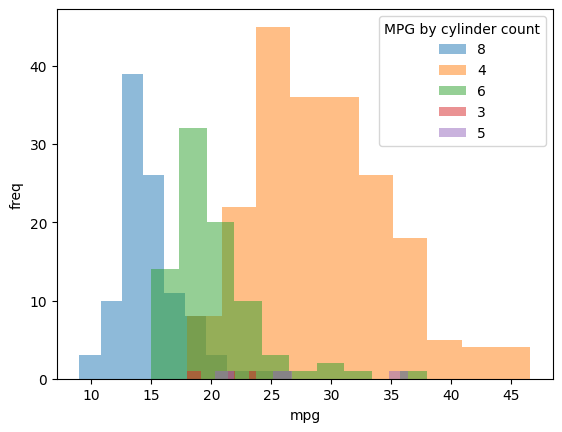

In [24]:
list_unique_cylinder = pd.unique(carfeatures["cylinders"])
print(list_unique_cylinder)

for category in list_unique_cylinder:
    temp_df   = carfeatures.query("cylinders == @category") #category comes from interative variable in loop
    plt.hist(x = temp_df["mpg"], alpha = 0.5)
    
# Add labels and a legends    
plt.xlabel("mpg")
plt.ylabel("freq")
plt.legend(labels = list_unique_cylinder,
           title  = "MPG by cylinder count")
plt.show()

empty dataset + adding two random variables

In [26]:
dataset = pd.DataFrame([])
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)
b0 = 1
b1 = 2
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"] #directly compute formulae
dataset["p"] = b0 + b1*dataset["x"] #line of best fit


plot data

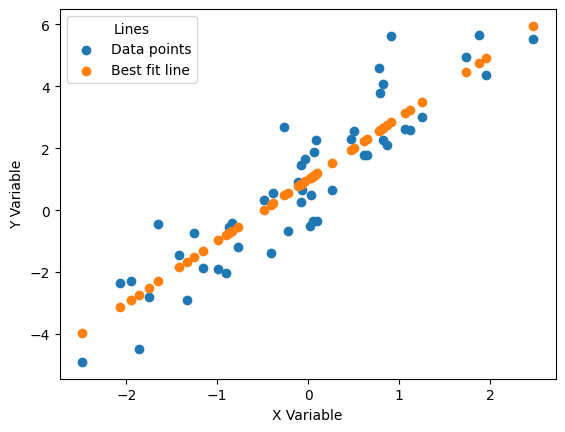

In [28]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"], title = "Lines")
plt.show()